In [10]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [11]:
df = pd.read_csv("./Data Sets/Cleaned_Solar_Data.csv")
print("Cleaned data loaded successfully!")
print(df.shape)
df.head()

Cleaned data loaded successfully!
(68845, 10)


,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,HOUR,MONTH
0,2020-05-15 06:00:00,41.857143,4.028571,0.0,7177992.0,24.088446,22.206757,0.005887,6,5
1,2020-05-15 06:00:00,57.000000,5.500000,0.0,6339380.0,24.088446,22.206757,0.005887,6,5
2,2020-05-15 06:00:00,54.625000,5.275000,0.0,7007866.0,24.088446,22.206757,0.005887,6,5
3,2020-05-15 06:00:00,54.625000,5.275000,0.0,6782598.0,24.088446,22.206757,0.005887,6,5
4,2020-05-15 06:00:00,38.625000,3.737500,0.0,7038681.0,24.088446,22.206757,0.005887,6,5


In [12]:
features = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR', 'MONTH']
target = 'DC_POWER'

X = df[features]
y = df[target]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (68845, 5)
Target shape: (68845,)


In [13]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (55076, 5)
Testing set: (13769, 5)


In [14]:

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        "R²": r2_score(y_test, preds),
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds))
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                         R²          MAE         RMSE
Linear Regression  0.664257  1755.511321  2250.709075
Random Forest      0.989165   177.417762   404.330686
Gradient Boosting  0.867792   976.050943  1412.358303


In [16]:
import joblib
import os

In [17]:
os.makedirs("./Models", exist_ok=True)

✅ Random Forest model saved successfully at ./Models/solar_rf_model.pkl

📊 Final Random Forest Evaluation:
R² Score: 0.9892
MAE: 177.42
RMSE: 404.33


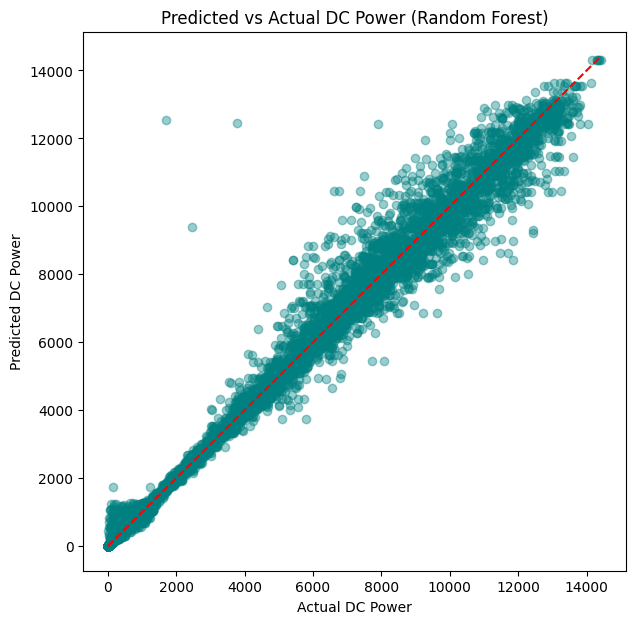

In [ ]:


# Save best model
joblib.dump(models["Random Forest"], "./Models/solar_rf_model.pkl")
print("Random Forest model saved successfully at ./Models/solar_rf_model.pkl")

# Predict on test set
best_model = models["Random Forest"]
y_pred = best_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 Final Random Forest Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Visualize actual vs predicted
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.xlabel("Actual DC Power")
plt.ylabel("Predicted DC Power")
plt.title("Predicted vs Actual DC Power (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
